In [98]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [99]:
def load_dataset(csv_path):
    df=pd.read_csv(csv_path, sep= ';')
    print("Actual columns in DataFrame:", df.columns)
    required_columns = ['Azimuth', 'Altitude', 'Timestamp']

    if not all(col in df.columns for col in required_columns):
        raise ValueError("Required columns are not present in the DataFrame.")
    
    X = df[['Azimuth', 'Altitude']].values
    y = df['Timestamp'].values
    return X, y, df

In [100]:
csv_path = '/root/solar_tracking_1/Training/cleaned_data/solar_data_january_1min_2023_timestamp.csv'

In [101]:
X, y, df = load_dataset(csv_path)

Actual columns in DataFrame: Index(['Timestamp', 'Azimuth', 'Altitude', 'Latitude', 'Longitude'], dtype='object')


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

In [104]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [105]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [106]:
model.fit(X_train_normalized, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
864/864 [==============================] - 8s 7ms/step - loss: 2407234199091150848.0000 - val_loss: 1112170373866061824.0000
Epoch 2/50
864/864 [==============================] - 6s 7ms/step - loss: 314440809212542976.0000 - val_loss: 162299804729212928.0000
Epoch 3/50
864/864 [==============================] - 6s 7ms/step - loss: 146686533456363520.0000 - val_loss: 126940369773395968.0000
Epoch 4/50
864/864 [==============================] - 6s 7ms/step - loss: 109357598297292800.0000 - val_loss: 87346775668555776.0000
Epoch 5/50
864/864 [==============================] - 6s 7ms/step - loss: 69692514461810688.0000 - val_loss: 47318152916238336.0000
Epoch 6/50
864/864 [==============================] - 6s 7ms/step - loss: 32984743242891264.0000 - val_loss: 15991267049603072.0000
Epoch 7/50
864/864 [==============================] - 6s 7ms/step - loss: 10696181185249280.0000 - val_loss: 2134238505730048.0000
Epoch 8/50
864/864 [==============================] - 6s 7ms/step - 

In [107]:
predictions = model.predict(X_test_normalized)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

271/271 [==============================] - 1s 3ms/step
Mean Squared Error: 2.7856237047749376e+18


ValueError: x and y must be the same size

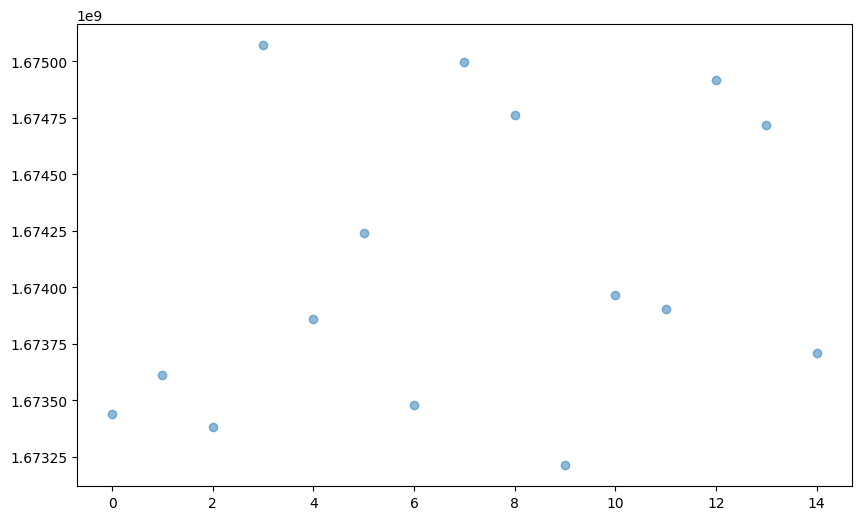

In [109]:
# Plot hasil prediksi dan data aktual untuk 10 data
plt.figure(figsize=(10, 6))

# Ambil hanya 10 data
num_data_to_plot = 15
X_test_subset = X_test[:num_data_to_plot]
y_test_subset = y_test[:num_data_to_plot]

# Plot azimuth aktual
plt.scatter(range(num_data_to_plot), y_test_subset, label='Actual Azimuth', alpha=0.5)

# Plot azimuth prediksi
predictions_subset = predictions[:num_data_to_plot]
plt.scatter(range(num_data_to_plot), predictions_subset, label='Predicted Azimuth', color='red', alpha=0.5)

plt.title('Actual vs Predicted Azimuth (Subset of 10 data)')
plt.xlabel('Data Index')
plt.ylabel('Azimuth')
plt.legend()
plt.show()
